 코렙에서 한글 사용

In [ ]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160815 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 7.0MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=888c6c4ed377c6565feb62b483af1e674fde20983e0a82730cd417aa467bcbf9
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


# 지도학습 - K-Nearest Neighbors (K-NN)

지도 학습 (Supervised Learning)
- 데이터에 대한 Label(명시적인 답)이 주어진 상태에서 컴퓨터를 학습시키는 방법. 

비지도 학습 (Unsupervised Learning)
- 데이터에 대한 Label(명시적인 답)이 없는 상태에서 컴퓨터를 학습시키는 방법.
- 데이터의 숨겨진 특성이나 구조를 파악하는데 사용.


분류 (Classification)
- 미리 정의된 여러 클래스 레이블 중 하나를 예측하는 것.
- 속성 값을 입력, 클래스 값을 출력으로 하는 모델
- 붓꽃(iris)의 세 품종 중 하나로 분류, 암 분류 등. 
- 이진분류, 다중 분류 등이 있다.


회귀 (Regression)
- 연속적인 숫자를 예측하는 것.
- 속성 값을 입력, 연속적인 실수 값을 출력으로 하는 모델
- 어떤 사람의 교육수준, 나이, 주거지를 바탕으로 연간 소득 예측. 
- 예측 값의 미묘한 차이가 크게 중요하지 않다.

일반화, 과대적합, 과소적합

일반화 (Generalization)
- 훈련 세트로 학습한 모델이 테스트 세트에 대해 정확히 예측 하도록 하는 것 .

과대적합 (Overfitting)
- 훈련 세트에 너무 맞추어져 있어 테스트 세트의 성능 저하.

과소적합 (Underfitting)
- 훈련 세트를 충분히 반영하지 못해 훈련 세트, 테스트 세트에서 모두 성능이 저하.


<center>
 <img src="https://image.slidesharecdn.com/2-171030145527/95/2supervised-learningepoch21-9-1024.jpg?cb=1509375471" alt="과대적합" width="40%" />

</center>

<center>
 <img src="https://image.slidesharecdn.com/2-171030145527/95/2supervised-learningepoch21-10-1024.jpg?cb=1509375471" alt="과소적합" width="60%" />

</center>

***일반화 성능이 최대화 되는 모델을 찾는 것이 목표***

과대적합 (Overfitting)
- 너무 상세하고 복잡한 모델링을 하여 훈련데이터에만 과도하게 정확히 동작하는 모델.

과소적합 (Underfitting)
- 모델링을 너무 간단하게 하여 성능이 제대로 나오지 않는 모델.


모델 복잡도 곡선

<center>
 <img src="https://tensorflowkorea.files.wordpress.com/2017/06/fig2-01.png" alt="모델 복잡도 곡선" width="60%" />

</center>



해결방법

- 주어진 훈련데이터의 다양성이 보장되어야 한다 (다양한 데이터포인트를 골고루 나타내야 한다)
- 일반적으로 데이터 양이 많으면 일반화에 도움이 된다.
- 그러나 편중된 데이터를 많이 모으는 것은 도움이 되지 않는다.
- 규제(Regularization)을 통해 모델의 복잡도를 적정선으로 설정한다.


## K-Nearest Neighbors (K-NN)


k-최근접 이웃 알고리즘

- 새로운 데이터 포인트와 가장 가까운 훈련 데이터셋의 데이터  포인트를 찾아 예측
- k 값에 따라 가까운 이웃의 수가 결정
- 분류와 회귀에 모두 사용 가능


- 입력 값과 k개의 가까운 점이 있다고 가정할 때 그 점들이 어떤 라벨과 가장 비슷한지 (최 근접 이웃)
판단하는 알고리즘

- 매개 변수 : 데이터 포인트 사이의 거리를 재는 방법 (일반적으로 유클리디안 거리 사용), 이웃의 수
 - 장점 : 이해하기 쉬운 모델, 약간의 조정으로 좋은 성능
 - 단점 : 훈련 세트가 크면 속도가 느림, 많은 특성을 처리하기 힘듬

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


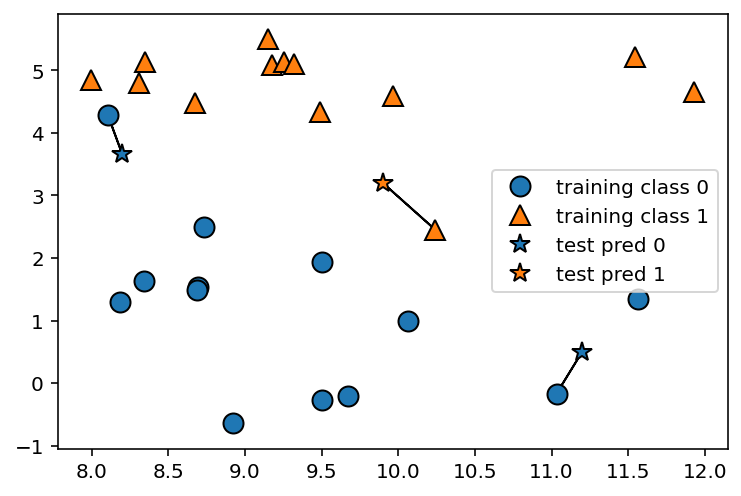

In [ ]:
import mglearn

mglearn.plots.plot_knn_classification(n_neighbors=1)

<center>
 <img src="https://tensorflowkorea.files.wordpress.com/2017/06/2-4.png?w=625" alt="1-최근접 이웃 모델" width="60%" />

1-최근접 이웃 모델

 <img src="https://tensorflowkorea.files.wordpress.com/2017/06/2-5.png?w=768" alt="3-최근접 이웃 모델" width="60%" />

 3-최근접 이웃 모델

</center>


- k 값이 작을 수록 모델의 복잡도가 상대적으로 증가.
    (noise 값에 민감)
- 반대로 k 값이 많아질수록 모델의 복잡도가 낮아진다.
- 100개의 데이터를 학습하고 k를 100개로 설정하여 예측하면 빈도가 가장 많은 클래스 레이블로 분류


앵그리버드는 팽귄? or 닭?

<center>
 <img src="https://t1.daumcdn.net/cfile/tistory/110188344CEB80083A" alt="앵그리버드 팽귄 닭" width="60%" />

</center>

유클리디안 거리 (Euclidean distance) : 두 점사이의 거리를 계산할 때 쓰이는 방법
- 두 점 (p1, p2, ...)와 (q1, q2, ....)의 거리


유클리디안 거리 공식

 <img src="https://wikidocs.net/images/page/24654/2%EC%B0%A8%EC%9B%90_%ED%8F%89%EB%A9%B4.png" alt="유클리디안 거리" width="60%" />

</center>

KNeighborsClassifier()
```
KNeighborsClassifier(n_neighbors, weights, algorithm, leaf_size, p, metric, metric_params, n_jobs)
```
- n_neighbors : 이웃의 수 (default : 5)
- weights : 예측에 사용된 가중 함수 (uniform, distance) (default : uniform)
- algorithm : 가까운 이웃을 계산하는데 사용되는 알고리즘 (auto, ball_tree, kd_tree, brute)
- leaf_size : BallTree 또는 KDTree에 전달 된 리프 크기
- p : (1 : minkowski_distance, 2: manhattan_distance 및 euclidean_distance)
- metric : 트리에 사용하는 거리 메트릭스
- metric_params : 메트릭 함수에 대한 추가 키워드 인수
- n_jobs : 이웃 검색을 위해 실행할 병렬 작업 수

KNeighborsClassifier 모델은 k-최근접 이웃 분류 또는 KNN이라고 합니다. <br>
k-NN 알고리즘은 가장 가까운 훈련 데이터 포인트 K개를 최근접 이웃으로 찾아 예측에 사용합니다. <br>
n_neighbors=1 는 1개를 최근접 이웃으로 하겠다는 것입니다.

주요 매개변수(Hyperparameter)
- 거리측정 방법, 이웃의 수, 가중치 함수 

scikit-learn의 경우
- metric  :  유클리디언 거리 방식
- k : 이웃의 수
- weight  : 가중치 함수
     -  uniform : 가중치를 동등하게 설정.
     -  distance :  가중치를 거리에 반비례하도록 설정


장단점
- 이해하기 매우 쉬운 모델
- 훈련 데이터 세트가 크면(특성,샘플의 수) 예측이 느려진다
- 수백 개 이상의 많은 특성을 가진 데이터 세트와 특성 값 대부분이 0인 희소(sparse)한 데이터 세트에는 잘 동작하지 않는다
- 거리를 측정하기 때문에 같은 scale을 같도록 정규화 필요


##### weight 가중치 함수 추가설명

예를 들어 
```
영화 : A -> 등급: 5.0 , X까지의 거리: 3.2
영화 : B -> 등급: 6.8 , X까지의 거리: 11.5
영화 : C -> 등급: 9.0 , X까지의 거리: 1.1
```
가 있다고 할 때 

평균을 구하면
> (5.0 + 6.8 + 9.0) / 3 = 6.93

거리에 대한 가중 평균을 구해보면
> (5.0/3.2 + 6.8/11.5 + 9.0/1.1) / (1/3.2 + 1/11.5 + 1/1.1) = 7.9

code
```
print( (5.0 + 6.8 + 9.0) / 3 )
print( (5.0/3.2 + 6.8/11.5 + 9.0/1.1) / (1/3.2 + 1/11.5 + 1/1.1) )
출력
6.933333333333334
7.898546346988861
```

#### iris 데이터를 이용한 KNN 분류 실습

붓꽃 데이터 셋
- 클래스 (class) : 출력될 수 있는 값 (붓꽃의 종류)
- 레이블 (label) : 특정 데이터 포인트에 대한 출력

<center>
 <img src="https://tensorflowkorea.files.wordpress.com/2017/06/1-2.png" alt="붓꽃" width="30%" />

</center>

붓꽃 (Iris)의 품종 분류

<center>
 <img src="https://thegoodpython.com/assets/images/iris-species.png" alt="붓꽃 품종" width="60%" />

</center>

데이터셋 구성
- 150개의 데이터
- 4개의 정보와 1개의 클래스(3개의 품종)로 구성

| sepal_length|	sepal_width|	petal_length|	petal_width|	species|
|---|---|---|---|---|
| 꽃받침 길이| 꽃받침 넓이| 꽃잎 길이| 꽃잎 넓이| 품종|


##### 사이킷 런 이용

In [ ]:
# 데이터 가져오기
from sklearn.datasets import load_iris

iris_dataset = load_iris()
#print(iris_dataset)
iris_dataset.keys()
#print(iris_dataset.data)
#print(iris_dataset.data.shape)
#print(iris_dataset.target)
#print(iris_dataset.target_names)
print(iris_dataset.DESCR)
#print(iris_dataset.feature_names)
#print(iris_dataset.filename)
'''
print(type(iris_dataset.data))
print(iris_dataset.data[:5])
print(iris_dataset.target[:5])
print(iris_dataset.target.shape)
'''

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

'\nprint(type(iris_dataset.data))\nprint(iris_dataset.data[:5])\nprint(iris_dataset.target[:5])\nprint(iris_dataset.target.shape)\n'

훈련 세트(training set) <br>
테스트 세트(test set), 홀드아웃 세트(hold-out set)

In [ ]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split
x = iris_dataset.data
y = iris_dataset.target
x_train,x_test ,y_train,y_test = train_test_split(x,y,random_state = 0) #train_set 과 test_set 을 분리하는 함수 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f57dbbe2390>,
      dtype=object)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


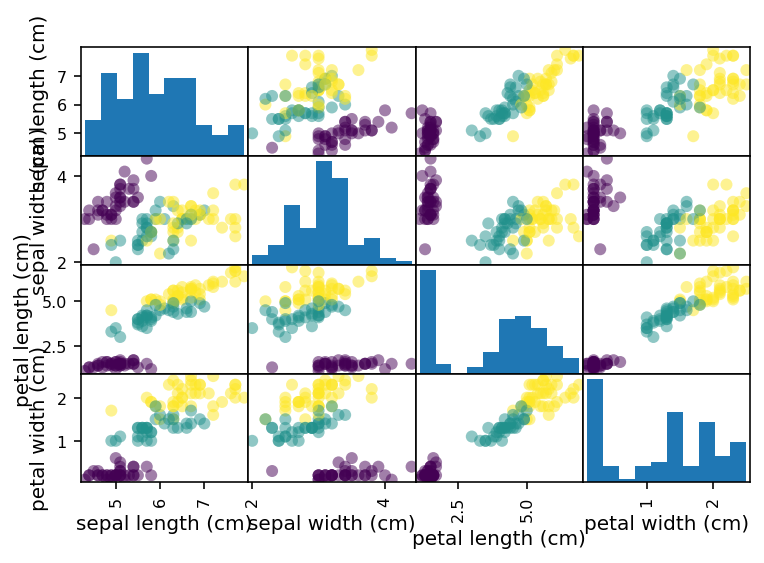

In [ ]:
# 데이터 조사
# 산점도 행렬 : 3개 이상의 특성을 표현
# 4개의 특성을 갖는 붓꽃
import pandas as pd
iris_df = pd.DataFrame(x_train,columns= iris_dataset.feature_names)
#display(iris_df)
pd.plotting.scatter_matrix(iris_df,c = y_train,marker = 'o')

##### seaborn 이용



In [ ]:
# 데이터 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# iris data loading
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [ ]:
# sepal_length	sepal_width	petal_length	petal_width	species
# 꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이, 품종
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


훈련 세트(training set) <br>
테스트 세트(test set), 홀드아웃 세트(hold-out set)

In [ ]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split
x = iris.iloc[:,0:4]
y = iris.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


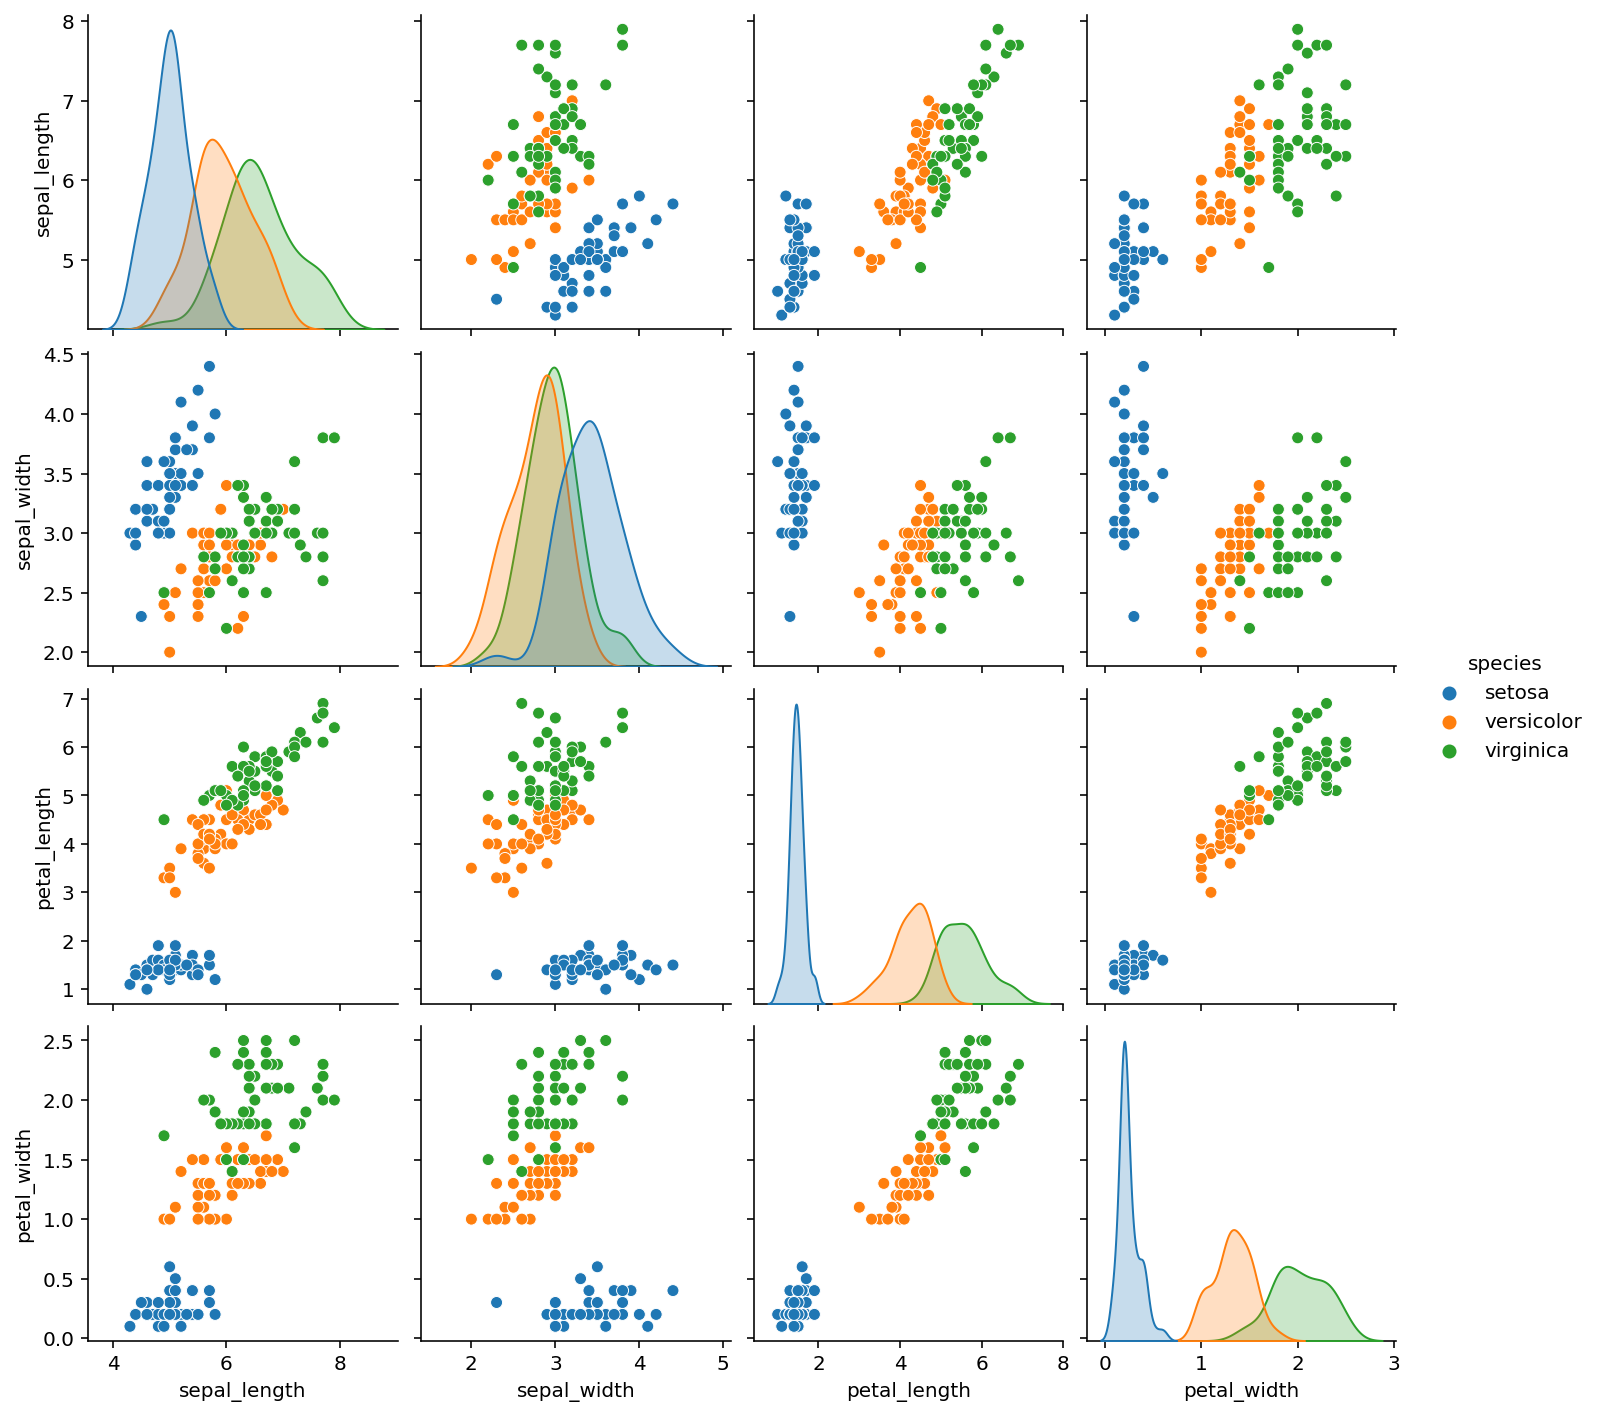

In [ ]:
# 데이터 조사
# 산점도 행렬 : 3개 이상의 특성을 표현
# 4개의 특성을 갖는 붓꽃
sns.pairplot(iris,hue = 'species')  #레이블 값으로 데이터 를 분류 
#대각선은 커널 밀도 함수로 나타낸다.


##### 공통

In [ ]:
# 머신러닝 모델
# k-최근접 이웃 알고리즘
# 훈련 데이터에서 새로운 데이터 포인트에 가장 가까운 'k개'의 이웃을 찾는다.
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
predict = model.predict(x_test)

print(predict)


['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica']


In [ ]:
# 모델 평가
# 테스트 세트 이용
from sklearn import metrics
score = metrics.accuracy_score(y_test,predict)
print(score)

0.9736842105263158


In [ ]:
# 예측하기
import numpy as np

x_newdata = [[5,2.9,1,0.2]]
pre = model.predict(x_newdata)
print(pre)

x_new = np.array(x_newdata)
pre = model.predict(x_new)
print(pre)


['setosa']
['setosa']


##### iris 데이터를 이용한 KNN 분류 실습 전체코드


In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# 데이터 가져오기
iris = sns.load_dataset('iris')
# iris data loading
x = iris.iloc[:,0:4]
y = iris.iloc[:,-1]

# 훈련 데이터와 테스트 데이터 준비
# 75% : 25%
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

# 모델 선택과 학습

# k-최근접 이웃 알고리즘
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
predict = model.predict(x_test)
score = metrics.accuracy_score(y_test,predict)

print(score)

# 예측활용

x_newdata = [[5,2.9,1,0.2]]
pre = model.predict(x_newdata)
print(pre)

0.9736842105263158
['setosa']


### KNeighborsClassifier 분석

#### 결정경계([descision boundary](https://developers.google.com/machine-learning/glossary#%EA%B2%B0%EC%A0%95-%EA%B2%BD%EA%B3%84decision-boundary))

이웃의 수를 늘릴수록 결정경계는 더 부드러워진다.

이웃을 적게 사용하면 모델의 복잡도가 높아지고, 
많이 사용하면 복잡도는 낮아진다.

In [ ]:
import platform
from matplotlib import font_manager, rc 
import matplotlib


```
# Windows
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
```

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0, flags=flags)


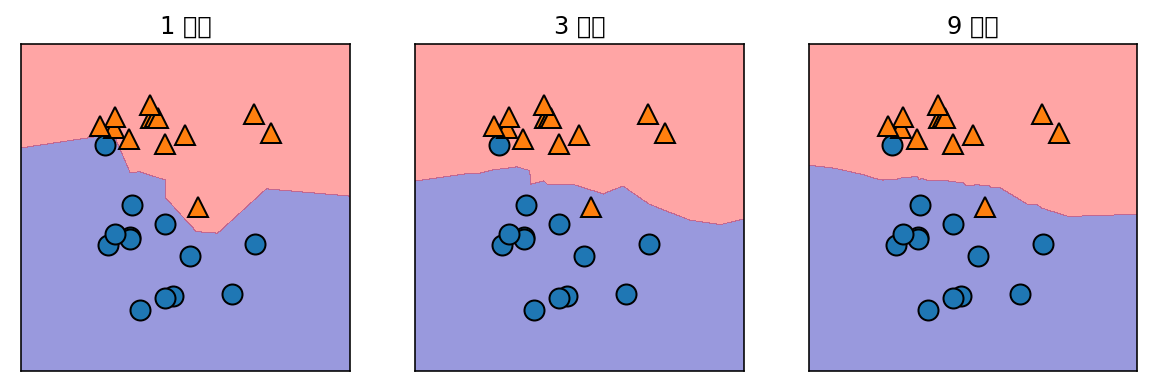

In [ ]:
# KNeighborsClassifier 분석
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()
# X_trina, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(X, y)
  mglearn.plots.plot_2d_separator(model, X, ax=ax, fill=True, alpha=0.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title(f'{n_neighbors} 이웃')

#### 모델 복잡도와 일반화 사이의 관계

이웃의 수 변화에 따른 훈련 세트와 테스트 세트의 성능 변화

- 데이터셋 : wisconsin의 유방암 데이터셋
- 총 569건의 데이터로 악성(212), 양성 (357)으로 구성

<center>
 <img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile7.uf.tistory.com%2Fimage%2F99306C335A1685AA111704" alt="wisconsin의 유방암 데이터셋" width="30%" />

</center>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.datasets import load_breast_cancer

canser = load_breast_cancer()
#print(canser)
print(canser.keys())

#print(canser.data)
print(canser.data.shape)
print(canser.target.shape)
'''
print(canser.feature_names.shape)
print(canser.feature_names)
print(canser.target_names)
print(canser.DESCR)
'''

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)
(569,)


'\nprint(canser.feature_names.shape)\nprint(canser.feature_names)\nprint(canser.target_names)\nprint(canser.DESCR)\n'

In [ ]:
import numpy as np

# 양성과 악성 데이터의 수
# zip() : 2개의 데이터를 연결
# bincount() : 클래스별 개수를 반환 넘파이로 사용 
#pd

for n,v in zip(canser.target_names,np.bincount(canser.target)):
  print({n:v})


{'malignant': 212}
{'benign': 357}


In [ ]:
# 특성의 명칭
canser.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
# 훈련 데이터와 테스트 데이터 분리
# stratify: default=None 입니다. classification을 다룰 때 매우 중요한 옵션값입니다. 
# stratify 값을 target으로 지정해주면 
# 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. 
# (한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고
#  classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.

x = canser.data
y = canser.target
x_train,x_test,y_train,y_test = train_test_split(x,y , 
                                                 stratify = y,
                                                 random_state = 0)

print(x_train.shape)
print(x_test.shape)  #75 : 25
print(y_train.shape)
print(y_test.shape)


(426, 30)
(143, 30)
(426,)
(143,)


In [ ]:
#비율 유지 확인 
print(np.bincount(y_train)[0]/sum(np.bincount(y_train)))
print(np.bincount(y_train)[1]/sum(np.bincount(y_train)))
print('---------------------------------------------------')

print(np.bincount(y_train)[0]/np.bincount(y_train)[1])
print(np.bincount(y_train)[1]/np.bincount(y_train)[0])

print('---------------------------------------------------')
print(np.bincount(y_test)[0]/sum(np.bincount(y_test)))
print(np.bincount(y_test)[1]/sum(np.bincount(y_test)))

print('---------------------------------------------------')
print(np.bincount(y_test)[0]/np.bincount(y_test)[1])
print(np.bincount(y_test)[1]/np.bincount(y_test)[0])


0.3732394366197183
0.6267605633802817
---------------------------------------------------
0.5955056179775281
1.679245283018868
---------------------------------------------------
0.3706293706293706
0.6293706293706294
---------------------------------------------------
0.5888888888888889
1.6981132075471699


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_

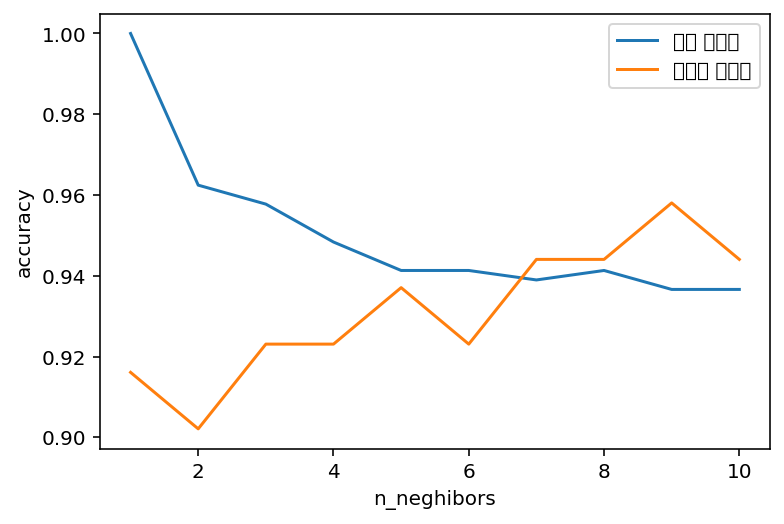

In [ ]:
train_acc = []
test_acc = []

n_neighbors = range(1,11)
for n in n_neighbors:
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(x_train,y_train)
  
  train_acc.append(model.score(x_train,y_train)) #질문
  test_acc.append(model.score(x_test,y_test))



plt.plot(n_neighbors,train_acc,label = '훈련 정확도')
plt.plot(n_neighbors,test_acc,label = '테스트 정확도')
plt.xlabel('n_neghibors')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
#matplot

print(max(train_acc))
print('-----------------------------------------')
print(max(test_acc))

1.0
-----------------------------------------
0.958041958041958


과대적합과 과소적합의 특징을 발견 (이웃의 수가 적을수록 모델이 복잡해지므로 그래프가 수평으로 뒤집힌 형태가 나타남) <br>
이웃의 수가 하나일 때 훈련 데이터에 대한 예측이 완벽하나, 이웃의 수가 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 줄어든다.

정확도가 가장 좋을 때는? -> 중간정도인 6개를 사용했을 경우

### K-NN 회귀

k-NN을 회귀에 사용한 경우
- 여러 개의 최근접 이웃을 사용할 경우에는 이웃 간의 평균이 예측 <br> (분류에서는 이웃의 레이블 개수를 확인해서 다수결로 정했지만, 회귀에서는 이웃들의 평균을 계산한다는 점이 차이)

- 분류는 모델과 비교하여 유사한 데이터의 개수(불연속)로 판단한다면 회귀는 데이터의 평균유사도 (연속적인)와 같은 수치로 판단

Classification(분류)는 연속적이지 않은 레이블, 다시 말해 ‘무엇’인지를 예측하지만, 회귀(Regression)는 연속된 수치, 즉 ‘얼마나’를 예측

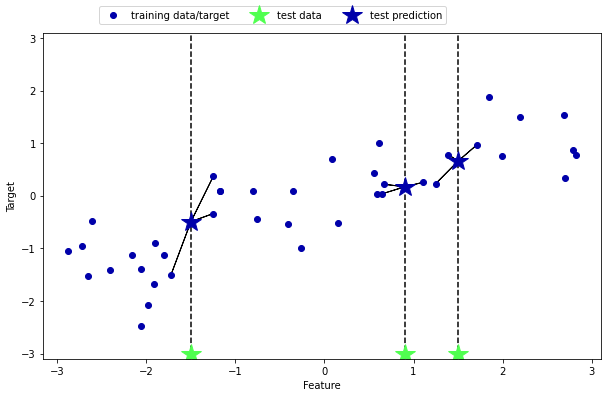

In [2]:
import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_knn_regression(n_neighbors=3)



KNeighborsRegressor()

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=9) #곡선모양으로 만들어진 데이터
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 0)

print(x_train)

reg = KNeighborsRegressor(n_neighbors= 3)
reg.fit(x_train,y_train)

pre = reg.predict(x_test)
pre

[[-2.06388816]
 [ 0.60669007]
 [-2.65149833]
 [ 0.59195091]
 [-0.75275929]
 [-2.06403288]]


array([-0.04382817, -0.04382817, -0.04382817])

#### K-NN 회귀 실습 01

IMDb 영화 데이터 세트

회귀에 대한 이야기니까 당연히 "평이 좋다" vs "평이 나쁘다" 레이블로 분류하는 게 아니라 <br>
실제 IMDb 등급(별점)을 예측하는 것이 과제의 목표

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# 영화에 대한 3개의 특성
X_train = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
# 영화에 대한 별점
y_train = [5.0, 6.8, 9.0]

# 코드작성(모델)
#....
model = KNeighborsRegressor(n_neighbors=3,weights='distance') #가중 평균을 적용한 케이스 
model.fit(X_train,y_train)



# 새로운 영화 3건에 대해 별점을 예측
X_test = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]

# 코드작성(예측)
#....
predict = model.predict(X_test)
print(predict)

[7.28143288 7.76451922 6.8457845 ]
